In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ssl

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Data Analysis steps:
#### 1. Define the question
#### 2. Define the ideal data set
#### 3. Obtain data
#### 4. Clean the data
#### 5. Exploratory Data Analysis
#### 6. Statistical Prediction/modeling
#### 7. Interpret results
#### 8. Challenge results
#### 9. Communicate results
#### 10. Build a Data Product

### Step 1: Define the Question(s)

In [5]:
'''
What was the most common issue a customer had towards airlines?

How fast did it take for an airline to respond? How did this relate to the satisfaction of the customer?

Which Airlines had the most staisfying responses from customers? How fast were they to respond?
'''

'\nWhat was the most common issue a customer had towards airlines?\n\nHow fast did it take for an airline to respond? How did this relate to the satisfaction of the customer?\n'

### Step 2: Identify the Data

In [6]:
''' Airlines such as  '''

' Airlines such as  '

#### Download VADER from nltk

In [7]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('vader_lexicon')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Crolw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Step 3: Obtain Data

#### Import Dataset(s)

In [8]:
# df = pd.read_csv('twas.csv')

df = pd.read_csv('twas_cleaned.csv')
textDF = pd.read_csv('twas_text_cleaned.csv')

In [13]:
df.head(10)
textDF.head(10)

,Unnamed: 0,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_stemmed,text_lemmatized,text_wo_emoticons,text_wo_url,text_wo_tags
0,0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcar propos,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcar sent sever privat messag one respond...,sprintcare sent several private message one re...,sprintcare sent several private message one re...,sprintcare sent several private message one re...,sprintcare sent several private message one re...
3,3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send privat messag assist click ‘messag...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcar,sprintcare,sprintcare,sprintcare,sprintcare
5,5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...,115712 please send us private message gain det...,115712 send private message gain details account,115712 send private message gain details account,115712 send privat messag gain detail account,115712 send private message gain detail account,115712 send private message gain detail account,115712 send private message gain detail account,115712 send private message gain detail account
6,6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service,sprintcare worst customer service,sprintcare worst customer service,sprintcare worst customer service,sprintcar worst custom servic,sprintcare worst customer service,sprintcare worst customer service,sprintcare worst customer service,sprintcare worst customer service
7,7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...,115713 saddening hear please shoot us dm look kc,115713 saddening hear shoot look kc,115713 saddening hear shoot look kc,115713 sadden hear shoot look kc,115713 saddening hear shoot look kc,115713 saddening hear shoot look kc,115713 saddening hear shoot look kc,115713 saddening hear shoot look kc
8,8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...,sprintcare gonna magically change connectivity...,sprintcare gonna magically change connectivity...,sprintcare gonna magically change connectivity...,sprintcar gonna magic chang connect whole fami...,s

### Step 4: Clean the Data

In [10]:
''' STEP 4: CLEAN THE DATA '''


''' DATA CLEAN HERE '''



'\nTRANSFORM TEXT DATA INTO SIMPLIFIED FORM\nTRANSFORM DATE\n'

### Step 5: Exploratory Data Analysis

#### Make function to get sentiment data

In [11]:
analyzer = SentimentIntensityAnalyzer()

def getSentiment(text):

    scores = analyzer.polarity_scores(text)

    if scores['compound'] > 0:
        sentiment = 1
    elif scores['compound'] < 0:
        sentiment = -1
    else:
        sentiment = 0

    return sentiment

#### Get sentiment data for each text data
#### Import result into new column

In [15]:
df['sentiment'] = textDF['text_lower'].apply(getSentiment)

In [16]:
df.head(10)

,Unnamed: 0,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,sentiment
0,0,1,sprintcare,False,2017-10-31,115712 understand would assist would need priv...,2,3.0,1
1,1,2,115712,True,2017-10-31,sprintcare propose,NaN,1.0,0
2,2,3,115712,True,2017-10-31,sprintcare sent several private message one re...,1,4.0,-1
3,3,4,sprintcare,False,2017-10-31,115712 send private message assist click ‘mess...,3,5.0,1
4,4,5,115712,True,2017-10-31,sprintcare,4,6.0,0
5,5,6,sprintcare,False,2017-10-31,115712 send private message gain detail account,"5,7",8.0,1
6,6,8,115712,True,2017-10-31,sprintcare worst customer service,"9,6,10",NaN,-1
7,7,11,sprintcare,False,2017-10-31,115713 saddening hear shoot look kc,NaN,12.0,-1
8,8,12,115713,True,2017-10-31,sprintcare gonna magically change connectivity...,"11,13,14",15.0,0
9,9,15,sprintcare,False,2017-10-31,115713 understand concern wed send direct mess...,12,16.0,1


#### Count the number of values for each sentiment score (Positve, Neutral, Negative)

In [17]:
sentimentCounts = df['sentiment'].value_counts()
sentimentCounts

 1    1444722
 0     693720
-1     673332
Name: sentiment, dtype: int64

#### Plot on a graph to display
<p> Green = Positive </p>
<p> Yellow = Neutral </p>
<p> Red = Negative </p>

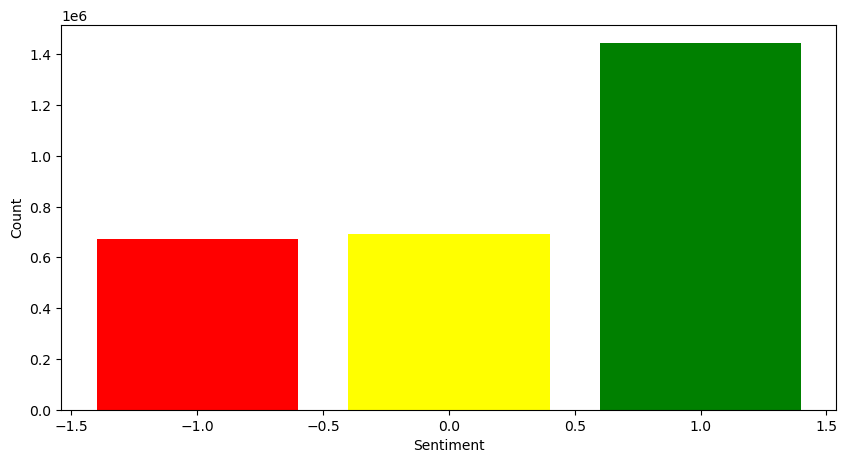

In [18]:
plt.figure(figsize = (10, 5))
plt.bar(sentimentCounts.index, sentimentCounts.values, color=['green', 'yellow', 'red'])

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# SORT DATASET BY SENTIMENT NEGATIVE (-1)
# SORT THAT DATASET BY INBOUND TWEETS TO SEE WHAT TYPE OF COMPLAINTS CUSTOMERS HAVE
# SORT BY AIRLINES => use author_id

### Step 6: Statistical Prediction/Modeling

In [ ]:
# SOME MACHINE LEARNING
# FIND WHAT TYPE OF METHOD I NEED TO USE TO SOLVE PROBLEM
# EXAMPLES: CLASSIFICATION, REGRESSION

### Step 7: Interpretation of Results

In [ ]:
# EXPLAIN WHAT VARIABLES CORRELATED WITH WHAT
# IF USING MACHINE LEARNING, EXPLAIN WHY SOME OF THE PREDICTIONS

### Step 8: Challenging of Results

In [ ]:
# BEFORE FINALIZING RESULTS
'''
QUESTIONS TO KEEP IN MIND:
Is this technique up to date with the industry, or are there better ways to solve this?
Are there other models or methods I can use to analyze this data?
Have I utilized the data to the best ability? Is there any more data I can collect to provide a more conclusive answer?
and many more…
'''

### Step 9: Communicate Results

In [ ]:
# USE A VISUALIZATION FORMAT TO VISUALIZE RESULTS
# EXAMPLES: TABLEAU, POWERBI, MATPLOT FIGURES

'''
TEMPLATE:
Start with your question and your problem statement
Summarize your analysis into a story.
Include the only essential analysis that adds value to your story and addresses the challenge.
Add “pretty” figures that contribute to the story.
Conclude with a summary of the important findings and any further techniques that can be explored to better answer the question.
'''

### Step 10: Data Product

In [ ]:
# TURN DATA INTO A PRODUCT
# EXAMPLES: DASHBOARDS, STREAMLIT FOR WEB APP